In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
random.seed(0)
%matplotlib inline

sale = θ1 ∗ T V + θ2 ∗ Radio + θ3 ∗ Newspaper + θ4 (1)

In [104]:
# Question 1:
# A

In [105]:
def load_data_from_file(file_name = 'advertising.csv'):
    data = np.genfromtxt(file_name, dtype = None, delimiter = ',', skip_header = 1)
    X = data[:, :3]
    y = data[:, 3]
    X = np.c_[np.ones((X.shape[0], 1)), X]
    
    return X, y

In [106]:
# Question 2
X, _ = load_data_from_file()
print(X[:5, :])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [107]:
# Question 3

_, y = load_data_from_file()
print(y.shape)

(200,)


In [108]:
def create_individual(n=4, bound=10):
    individual = []
    for _ in range(n):
        gene = random.uniform(-bound/2, bound/2)
        individual.append(gene)
    return individual

In [109]:
individual = create_individual()
print(individual)

[3.4442185152504816, 2.5795440294030243, -0.79428419169155, -2.4108324970703663]


In [110]:
X, y = load_data_from_file()

def compute_loss(individual):
    theta = np.array(individual)
    y_hat = X.dot(theta)
    loss = np.multiply((y_hat - y), (y_hat - y)).mean()
    return loss

def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness_value =  1 / (loss + 1)
    return fitness_value

In [111]:
# Question 4
X, y = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


In [112]:
def crossover(individual_1, individual_2, crossover_rate = 0.9):
    individual_1_new = individual_1.copy()
    individual_2_new = individual_2.copy()
    
    for i in range(4):
        if random.random() < crossover_rate:
            individual_1_new[i] = individual_2[i]
            individual_2_new[i] = individual_1[i]
    return individual_1_new, individual_2_new  

In [113]:
# Question 5
individual_1 = [4.09 , 4.82 , 3.10 , 4.02]
individual_2 = [3.44 , 2.57 , -0.79 , -2.41]

individual_1 , individual_2 = crossover (individual_1, individual_2 , 2.0)
print ("individual_1: ", individual_1 )
print ("individual_2: ", individual_2 )

individual_1:  [3.44, 2.57, -0.79, -2.41]
individual_2:  [4.09, 4.82, 3.1, 4.02]


In [114]:
def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()
    
    for i in range(4):
        if random.random() < mutation_rate:
            individual_m[i] = (random.random()*2 - 1)*100
    return individual_m

In [115]:
# Question 6
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate = 2.0)
print(before_individual == after_individual)

False


In [116]:
def initialize_population(m):
    population = [create_individual() for _ in range(m)]
    return population

In [117]:
def selection(sorted_old_population, m = 100):
    index_1 = random.randint(0, m-1)
    while True:
        index_2 = random.randint(0, m-1)
        if (index_2 != index_1):
            break
    individual_s = sorted_old_population[index_1]
    if index_2 > index_1:
        individual_s = sorted_old_population[index_2]
    return individual_s

In [118]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)

    if gen%1 == 0:
        print("Generation:", gen, ",", "best loss:", compute_loss(sorted_population[m-1]), "with chromsome: ", sorted_population[m-1])

    new_population = []
    while len(new_population) < m-elitism:
        # selection
        individual1 = selection(sorted_population, m)
        individual2 = selection(sorted_population, m)

        # crossover
        individual_c1, individual_c2 = crossover(individual1, individual2)

        # mutation
        individual_m1 = mutate(individual_c1)
        individual_m2 = mutate(individual_c2)
        
        new_population.append(individual_m1)
        new_population.append(individual_m2)

        # copy elitism chromosomes that have best fitness score to the next generation
    for ind in sorted_population[m-elitism:]:
        new_population.append(ind)


    return new_population, compute_loss(sorted_population[m-1])

In [119]:
# Question 7
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2 ]
new_population , _ = create_new_population(old_population, elitism =2, gen =1)

Generation: 1 , best loss: 123415.051528805 with chromsome:  [3.44, 2.57, -0.79, -2.41]


In [120]:
def run_ga():
    n_generations = 100
    m = 600
    X, y = load_data_from_file()
    population = initialize_population(m)
    losses_list = []
    for i in range(n_generations):
        population, best_loss = create_new_population(population, gen=i)
        losses_list.append(best_loss)
    return losses_list, population

In [121]:
def visualize_loss(losses_list):
    plt.plot(losses_list)
    plt.xlabel('Generation')
    plt.ylabel('losses')
    plt.title('Loss over Generations')
    plt.show()

Generation: 0 , best loss: 499.4287054364574 with chromsome:  [3.331600837968306, -0.09720038244186391, 1.4498755629428342, -0.2732124726990648]
Generation: 1 , best loss: 499.4287054364574 with chromsome:  [3.331600837968306, -0.09720038244186391, 1.4498755629428342, -0.2732124726990648]
Generation: 2 , best loss: 499.4287054364574 with chromsome:  [3.331600837968306, -0.09720038244186391, 1.4498755629428342, -0.2732124726990648]
Generation: 3 , best loss: 499.4287054364574 with chromsome:  [3.331600837968306, -0.09720038244186391, 1.4498755629428342, -0.2732124726990648]
Generation: 4 , best loss: 378.7765160934299 with chromsome:  [-2.1544301599421747, 0.12118650611431292, 0.4848429657251341, 0.16124298167449513]
Generation: 5 , best loss: 378.7765160934299 with chromsome:  [-2.1544301599421747, 0.12118650611431292, 0.4848429657251341, 0.16124298167449513]
Generation: 6 , best loss: 177.69866963001837 with chromsome:  [-2.804714859819608, 0.1900730923140177, 0.06813167984786173, -0.

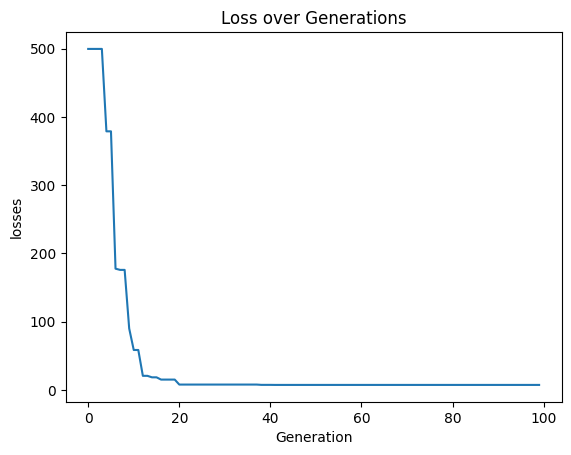

In [122]:
losses_list, population = run_ga()
visualize_loss(losses_list)

[4.996858759414602, 0.03923197330006545, 0.06813167984786173, 0.08978448260699956]


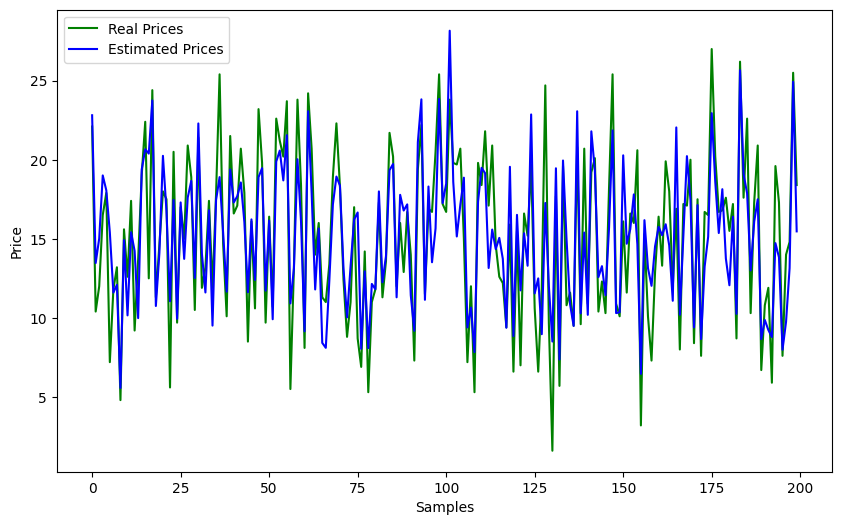

In [123]:
def visualize_predict_gt(population):
  # visualization of ground truth and predict value
  sorted_population = sorted(population, key=compute_fitness)
  print(sorted_population[-1])
  theta = np.array(sorted_population[-1])

  estimated_prices = []
  for feature in X:
    estimated_price = np.dot(feature, theta)
    estimated_prices.append(estimated_price)

  fig, ax = plt.subplots(figsize=(10, 6))
  plt.xlabel('Samples')
  plt.ylabel('Price')
  plt.plot(y, c='green', label='Real Prices')
  plt.plot(estimated_prices, c='blue', label='Estimated Prices')
  plt.legend()
  plt.show()

random.seed(0)
visualize_predict_gt(population)